# ***Python para Machine Learning***


```
Bootcamp Geração Tech Unimed-BH - Ciência de Dados
Notas de aula de Argemiro Leite
Apresentação: Prof. Dr. Diego Renan
```

## ***Introdução***

Em ciência da computação e campos relacionados, redes neurais artificiais ou redes neuronais artificiais (RNAs) são modelos computacionais inspirados pelo sistema nervoso central de um animal (em particular o cérebro) que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões.

Uma rede neural utilizada em aprendizado de máquina imita os processos de aprendizado do cérebro humano. Orientada por algoritmos avançados, essa rede  identifica padrões em conjuntos de dados vastos, permitindo generalizações mais precisas sobre o que estivermos estudando, por exemplo, identificação de imagens de escrita à mão livre de letras e números.

<center>Estutura básica de uma rede neural

![](https://drive.google.com/uc?id=1I7T1tbdrK3BdMjjc399G7Zxcm2ZlLbg8)
</center>

Para tanto é necessário preparar as imagens (sinais de entrada), criando uma base de dados de para a etapa de treinamento, dentro da abordagem do ML (_Machine Learning_).

A transformação de imagem é um processo feito para alterar os valores originais dos pixels da imagem para um conjunto de novos valores. Um tipo de transformação que fazemos nas imagens é transformar uma imagem em um ***tensor***.

Tensor é uma matriz n-dimensional e é interessante usarmos ele durante os processos por conta de que podem ser utilizados tanto na CPU quanto em GPU, pois isso acelera o processo computacional relacionado à _deep learning_ ou aprendizagem profunda.

Quando uma imagem é transformada em um tensor pela biblioteca _Pytorch_, os valores de pixel são redimensionados entre 0,0 e 1,0. Este formato é mais bem aceito pelos modelos de rede neurais existentes garantindo melhor performance.

Cada pixel individual da imagem é dividido em seus 3 canais de cores e montado junto com a posição do pixel em um tensor. Para garantir que todos os tensores tenham sempre o mesmo tamanho (mesmo número de entradas para a rede neural), todas as imagens devem, primeiro, ser dimensionadas para um tamanho uniforme.

Com a bliblioteca _PyTorch_, essa transformação pode ser feita usando:
```
torchvision.transforms.ToTensor(). 
``` 
Ela converte a imagem PIL (Image-handling packages) com um intervalo de pixels de [0, 255] em um PyTorch FloatTensor (CHW) com um intervalo [0,0, 1,0].

O modelo de ***rede neural*** a ser usado no projeto será o [InceptionV3](https://keras.io/api/applications/inceptionv3/) desenvolvido pelo Facebook para reconhecimento facial.

## ***Objetivo***
Nesse projeto iremos implementar uma rede neural baseada no modelo Inception, desenvolvendo uma abordagem procedural em Python usando o Mnist Database.

O Mnist é um grande banco de dados de dígitos manuscritos que é comumente usado para treinar vários sistemas de processamento de imagem. Esse banco de dados também é amplamente utilizado para treinamento e testes na área de aprendizado de máquina (ML).


## ***Desenvolvimento***

### ***Importando as bibliotecas***

In [1]:
import numpy as np                           # 
import torch                                 #
import torch.nn.functional as F              #
import torchvision                           #
import matplotlib.pyplot as plt              #
from time import time                        #
from torch import nn, optim                  #
from torchvision import transforms, datasets #

In [2]:
# Definir a conversão de imagem para tensor
transform = transforms.ToTensor()

In [3]:
# Carregar a parte de treino do dataset
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



In [4]:
# Criar um buffer para receber parte dos dados
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
# Carregar a parte de validação do dataset
valset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)

In [6]:
# Criar um buffer para receber parte dos dados
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [7]:
# Recuperando a representação de um dígito para comprovação da estrutura de dados montada

In [8]:
# A função iter() lê a imagem disponibilizada em trainloader
dataiter = iter(trainloader)

In [9]:
# Carregando uma imagem tensor em imagens
imagens, etiquetas = dataiter.next()

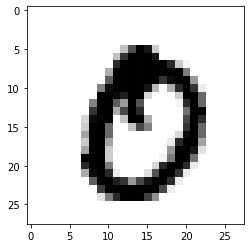

In [10]:
# Plotar o conjunto de imagens baixadas 
plt.imshow(imagens[17].numpy().squeeze(),cmap='gray_r')


In [11]:
len(imagens)

64

In [12]:
print (imagens[17])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
print (etiquetas)

tensor([8, 3, 8, 9, 9, 7, 3, 5, 3, 9, 2, 0, 6, 4, 2, 2, 1, 0, 0, 5, 5, 3, 9, 4,
        9, 6, 0, 4, 6, 8, 9, 0, 1, 5, 7, 4, 7, 1, 3, 7, 0, 7, 3, 0, 0, 4, 4, 0,
        6, 8, 1, 6, 8, 1, 1, 6, 8, 7, 1, 8, 1, 9, 6, 0])


In [14]:
# Conferir o tamanho do tensor da imagem (shape())
print (imagens.shape)

torch.Size([64, 1, 28, 28])


In [15]:
# Conferir o tamanho do tensor da etiqueta (shape())
print (etiquetas.shape)

torch.Size([64])


### ***Criação da rede neural***


Agora iremos utilizar um modelo de rede neural para treinar o reconhecimento das imagens tensor existentes no dataset baixado anteriormente. 

O modelo usado será o [Inception V3](https://keras.io/api/applications/inceptionv3/) cuja arquitetura está abaixo reprentada. Esse modelo foi utilizado inicialmente pelo Facebook para reconhecimento facial. 

![Rede Neural Inception V3](https://drive.google.com/uc?id=1apskCmytU_aCJq_LofQSLKrGT7Rp_85w "Rede neural Inception V3")


Inicialmente vamos inserir as camadas. A camada de entrada é constituída de 784 neurônios que se ligam aos 128 neurônios da camada 1. Esses 128 neurônios da camada 1 ligam-se a 64 neurônios da camada 2, que por sua vez, ligam-se a 10 neurônios da camada de saída.

A seguir criaremos a classe Modelo() que representa essas camadas:

In [16]:
class Modelo(nn.Module):
   def __init__(self):
      super(Modelo, self).__init__()
      self.linear1 = nn.Linear(28*28, 128)
      self.linear2 = nn.Linear(128, 64)
      self.linear3 = nn.Linear(64,10)

A seguir será definida a função forward() que ativa cada uma das camadas da rede criada.

In [17]:
def forward(self,X):
    X = F.relu(self.linear1(X))     # Ativação da camada de entrada para camada interna 1
    X = F.relu(self.linear2(X))     # Ativação da camada interna 1 para camada interna 2
    X = self.linear3(X)             # Ativação da camada interna 2 para a camada de saída
    return F.log_softmax(X, dim=1) 

### ***Estrutura de treinamento do modelo***

Montaremos agora a estrutura de treinamento da nossa rede criando a função ***treino()***.

No treinamento deve ser definido um número de épocas para que o treinamento ocorra. Geralmente quanto mais épocas forem definidas mais acurado será o aprendizado do modelo.

Também será inserido um otimizador que define a política de atualização dos pesos e da bias. Acrescentaremos uma função  _time ()_ para sabermos quanto tempo durou o treino. 

Outras implementações como cálculo de perdas acumuladas e instantânea também foram feitas na mesma função e estão comentadas abaixo:

In [18]:

def treino (modelo, trainloader, device):
    
    # define a política de atualização dos pesos e da bias
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)

    inicio = time()

    # definindo o critério para calcular a perda
    criterio = nn.NLLLoss()

    # definindo o numero de epocas que o algoritmo rodará
    EPOCHS = 10

    # ativando o modo de treinamento do modelo
    modelo.train()

    for epoch in range (EPOCHS):

        # inicialização da perda acumulada da epoca em questao 
        perda_acumulada = 0

        for imagens, etiquetas in trainloader:
 
            # convertendo as imagens para vetores de 28*28 casas
            imagens = imagens.view(imagens.shape[0], -1)

            # zerando os gradientes por conta do ciclo anterior
            otimizador.zero_grad()

            # colocando dados no modelo
            output = modelo(imagens.to(device))

            # calculando a perda da epoca em questao
            perda_instantanea = criterio(output, etiquetas.to(device)) 

            # back propagation a partir da perda
            perda_instantanea.backward() 

            # atualizando os pesos e a bias
            otimizador.step()

            # atualização da perda acumulada
            perda_acumulada += perda_instantanea.item()

        else:

            print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))

    print ("\nTempo de treino (em minutos) =" , (time() - inicio)/60)

No modelo acima foi definido um valor de 10 épocas de treinamento apenas por fins didáticos. Num cenário real o valor de épocas deve ser no mínimo 100.

### ***Validação do treinamento***

O algoritmo de validação é proposto pelo próprio Inception V3 e foram feitas as devidas adaptações.

In [21]:
def validação (modelo, valloader, device):
    conta_corretas, conta_todas = 0, 0
    for imagens, etiquetas in valloader:  
        for i in range(len(etiquetas)):
            img = imagens[i].view(1,784)
            
            # desativar o autograd para acelerar a validação 
            # Grafos computacionais dinâmicos tem alto custo de processamento

            with torch.no_grad():

                # outuput do modelo em escala logaritmica
                logps = modelo(img.to(device))

            # converte output para escala normal (lembrando que é um tensor)
            ps = torch.exp(logps)

            probab = list(ps.cpu().numpy()[0])

            # converte o tensor em um número, no caso, o número que o modelo previu
            etiqueta_pred = probab.index(max(probab))

            etiqueta_certa = etiquetas.numpy()[i]

            # compara a previsão com o valor correto
            if (etiqueta_certa == etiqueta_pred):

                conta_corretas += 1

            conta_todas += 1


    print("Total de imagens testadas =", conta_todas)

    print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))

Criando o modelo e testando o device para ver se a GPU suporta CUDA (Compute Unified Device Architecture) que possibilita computação em paralelo.

In [ ]:
modelo = Modelo()

device = torch.device("cuda" if torch.cuda.is_avaiable() else "cpu")

## ***Conclusão***

Nesse projeto foi apresentado a estrutura necessária para criação de um ambiente de Machine Learning para reconhecimento de algarismos numéricos, desde a importação das bibliotecas, passando pela preparação da base de dados de imagens usando o padrão tensor, implementando uma rede neural baseada no Inception V3, criando o ambiente de treino e finalizando com a validação do modelo.


## ***Referências***

Rede neural artificial<br>
https://pt.wikipedia.org/wiki/Rede_neural_artificial

Transformar imagem em um tensor<br>
https://cursos.alura.com.br/forum/topico-transformar-imagem-em-um-tensor-179620

Primeiros passos com Pytorch<br>
https://www.alura.com.br/artigos/primeiros-passos-com-pytorch

Add image from Google Drive<br>
https://stackoverflow.com/questions/52063556/add-image-to-github-readme-md-from-google-drive

StackOverFlow<br>
https://stackoverflow.com/questions/61856895/nameerror-name-transforms-is-not-defined-while-using-google-colab

Glossário de termos técnicos da área de ML (UFSC) <br> 
https://lapix.ufsc.br/ensino/visao/visao-computacionaldeep-learning/deep-learningglossario/

